In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import sunau
from scipy import signal
from scipy.io import wavfile
import pandas as pd
import pywt
import librosa
#import python_speech_features
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import pywt # Python wavelet transform implementation
from sklearn.base import BaseEstimator, TransformerMixin # Interfaces and base classes for pipeline components
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.fft import fft, ifft
import SignalTransformers as st
from kymatio.sklearn import Scattering1D

In [4]:
def loadAudio(audioPath):
    sample_rate, samples = wavfile.read(audioPath)
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    spectrogram = np.log(spectrogram)
    transposed_spec = spectrogram.transpose()
    freq_list = list(frequencies)
    #freq_list = [str(f) for f in freq_list]
    #freq_list = [f + " Hz" for f in freq_list]
    spectrogram_df = pd.DataFrame(transposed_spec, index = times, columns = freq_list )
    spectrogram_df.index = times
    spectrogram_df
    return [spectrogram_df, samples, sample_rate]


def loadWaveToArray(audioPath):
    sample_rate, samples = wavfile.read(audioPath)
    return samples

In [16]:
data = pd.read_csv("C:\\Users\\kbk17\\kaggle audio data\\train.csv")

In [17]:
data

fname         label  manually_verified
0     00044347.wav        Hi-hat                  0
1     001ca53d.wav     Saxophone                  1
2     002d256b.wav       Trumpet                  0
3     0033e230.wav  Glockenspiel                  1
4     00353774.wav         Cello                  1
...            ...           ...                ...
9468  ffec59fb.wav     Fireworks                  0
9469  fff37590.wav        Hi-hat                  0
9470  fff44ac6.wav      Laughter                  0
9471  fff6a13d.wav         Chime                  0
9472  fff81f55.wav         Cough                  1

[9473 rows x 3 columns]

In [21]:
#illustrating self referential index filtering 
data[data["label"] == "Cello"]

fname  label  manually_verified
4     00353774.wav  Cello                  1
5     003b91e8.wav  Cello                  0
14    0091fc7f.wav  Cello                  1
32    011a2185.wav  Cello                  1
46    0184c390.wav  Cello                  0
...            ...    ...                ...
9348  fc9db86a.wav  Cello                  0
9402  fe4d3c34.wav  Cello                  0
9417  fecb559e.wav  Cello                  0
9448  ff875923.wav  Cello                  0
9458  ffc92b01.wav  Cello                  1

[300 rows x 3 columns]

In [22]:
data[data["label"] == 'Trumpet']

fname    label  manually_verified
2     002d256b.wav  Trumpet                  0
115   034e4ffa.wav  Trumpet                  0
131   03e13ae7.wav  Trumpet                  0
144   04335030.wav  Trumpet                  0
148   04490642.wav  Trumpet                  0
...            ...      ...                ...
9383  fda6e775.wav  Trumpet                  0
9393  fde0d3c4.wav  Trumpet                  0
9401  fe42eb16.wav  Trumpet                  0
9416  fec180d4.wav  Trumpet                  1
9451  ff9c6c3f.wav  Trumpet                  0

[300 rows x 3 columns]

In [23]:
cello_df = data[data["label"].str.lower() == "cello"]
trumpet_df = data[data["label"].str.lower() == "trumpet"]
merged_df = pd.concat([cello_df, trumpet_df])
merged_df

fname    label  manually_verified
4     00353774.wav    Cello                  1
5     003b91e8.wav    Cello                  0
14    0091fc7f.wav    Cello                  1
32    011a2185.wav    Cello                  1
46    0184c390.wav    Cello                  0
...            ...      ...                ...
9383  fda6e775.wav  Trumpet                  0
9393  fde0d3c4.wav  Trumpet                  0
9401  fe42eb16.wav  Trumpet                  0
9416  fec180d4.wav  Trumpet                  1
9451  ff9c6c3f.wav  Trumpet                  0

[600 rows x 3 columns]

In [24]:
filepath = "C:\\Users\\kbk17\\kaggle audio data\\audio_train\\"

In [25]:
MAX_SAMPLE_SIZE = 30*44100
MAX_SAMPLE_SIZE

1323000

In [26]:
merged_df["fname"] = filepath + merged_df["fname"]

In [27]:
tiny_df = merged_df.sample(100)

In [28]:
tiny_df

fname    label  \
3642  C:\Users\kbk17\kaggle audio data\audio_train\6...    Cello   
4482  C:\Users\kbk17\kaggle audio data\audio_train\7...  Trumpet   
7024  C:\Users\kbk17\kaggle audio data\audio_train\b...  Trumpet   
4300  C:\Users\kbk17\kaggle audio data\audio_train\7...  Trumpet   
667   C:\Users\kbk17\kaggle audio data\audio_train\1...  Trumpet   
...                                                 ...      ...   
8954  C:\Users\kbk17\kaggle audio data\audio_train\f...    Cello   
1219  C:\Users\kbk17\kaggle audio data\audio_train\2...  Trumpet   
4687  C:\Users\kbk17\kaggle audio data\audio_train\7...  Trumpet   
867   C:\Users\kbk17\kaggle audio data\audio_train\1...  Trumpet   
7577  C:\Users\kbk17\kaggle audio data\audio_train\c...    Cello   

      manually_verified  
3642                  0  
4482                  0  
7024                  1  
4300                  0  
667                   1  
...                 ...  
8954                  0  
1219                  0  
4687                  0  
867                   1  
7577                  0  

[100 rows x 3 columns]

In [29]:
merged_df

target_df = tiny_df



In [30]:
target_df["samples"] = target_df["fname"].apply(loadWaveToArray)

In [31]:
target_df["samples"]

3642    [-1, 2, 2, 2, -9, -3, 1, -3, 3, -2, 5, 8, 4, 1...
4482    [0, 0, -1, -1, -1, -1, 2, -2, -1, 1, 0, -1, 0,...
7024    [-5, -7, -5, -5, -4, -8, -5, -6, -4, -6, -6, -...
4300    [1, -1, -2, 0, -1, 0, 1, -1, 0, 0, 0, -1, -2, ...
667     [2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, -1, 0,...
                              ...                        
8954    [0, 2, 0, 1, 0, 1, 1, 0, -1, -1, 0, -1, 0, -2,...
1219    [-2, -1, -1, -1, 1, 0, 0, 0, -1, 0, 1, -1, 0, ...
4687    [-1, -2, -1, 0, 0, -1, -1, -3, -1, 0, -2, 0, 0...
867     [-49, -48, -56, -61, -66, -67, -71, -70, -69, ...
7577    [-1, -3, -3, -8, -10, -9, -12, -17, -17, -21, ...
Name: samples, Length: 100, dtype: object

In [67]:
def pad_samples(a, max_sequence_length, axis, pad_value):
    return np.pad(a, (0,max_sequence_length-a.shape[axis]), 'constant', constant_values=pad_value)

In [33]:
target_df["samples"] = target_df["samples"].apply(pad_samples)
target_df["samples"]

3642    [-1, 2, 2, 2, -9, -3, 1, -3, 3, -2, 5, 8, 4, 1...
4482    [0, 0, -1, -1, -1, -1, 2, -2, -1, 1, 0, -1, 0,...
7024    [-5, -7, -5, -5, -4, -8, -5, -6, -4, -6, -6, -...
4300    [1, -1, -2, 0, -1, 0, 1, -1, 0, 0, 0, -1, -2, ...
667     [2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, -1, 0,...
                              ...                        
8954    [0, 2, 0, 1, 0, 1, 1, 0, -1, -1, 0, -1, 0, -2,...
1219    [-2, -1, -1, -1, 1, 0, 0, 0, -1, 0, 1, -1, 0, ...
4687    [-1, -2, -1, 0, 0, -1, -1, -3, -1, 0, -2, 0, 0...
867     [-49, -48, -56, -61, -66, -67, -71, -70, -69, ...
7577    [-1, -3, -3, -8, -10, -9, -12, -17, -17, -21, ...
Name: samples, Length: 100, dtype: object

In [34]:
target_df["samples"].head(1).values

array([array([    -1,      2,      2, ..., -32768, -32768, -32768], dtype=int16)],
      dtype=object)

In [35]:
from sklearn.svm import SVC
pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('normfft', NormFFT(MAX_SAMPLE_SIZE)),
                 ('minmaxscaler', MinMaxScaler()),
                 ('svc', SVC())
                ])

In [36]:
target_df["y_label"] = target_df["label"].map({"Cello": 0, "Trumpet": 1})

In [37]:
target_df

fname    label  \
3642  C:\Users\kbk17\kaggle audio data\audio_train\6...    Cello   
4482  C:\Users\kbk17\kaggle audio data\audio_train\7...  Trumpet   
7024  C:\Users\kbk17\kaggle audio data\audio_train\b...  Trumpet   
4300  C:\Users\kbk17\kaggle audio data\audio_train\7...  Trumpet   
667   C:\Users\kbk17\kaggle audio data\audio_train\1...  Trumpet   
...                                                 ...      ...   
8954  C:\Users\kbk17\kaggle audio data\audio_train\f...    Cello   
1219  C:\Users\kbk17\kaggle audio data\audio_train\2...  Trumpet   
4687  C:\Users\kbk17\kaggle audio data\audio_train\7...  Trumpet   
867   C:\Users\kbk17\kaggle audio data\audio_train\1...  Trumpet   
7577  C:\Users\kbk17\kaggle audio data\audio_train\c...    Cello   

      manually_verified                                            samples  \
3642                  0  [-1, 2, 2, 2, -9, -3, 1, -3, 3, -2, 5, 8, 4, 1...   
4482                  0  [0, 0, -1, -1, -1, -1, 2, -2, -1, 1, 0, -1, 0,...   
7024                  1  [-5, -7, -5, -5, -4, -8, -5, -6, -4, -6, -6, -...   
4300                  0  [1, -1, -2, 0, -1, 0, 1, -1, 0, 0, 0, -1, -2, ...   
667                   1  [2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, -1, 0,...   
...                 ...                                                ...   
8954                  0  [0, 2, 0, 1, 0, 1, 1, 0, -1, -1, 0, -1, 0, -2,...   
1219                  0  [-2, -1, -1, -1, 1, 0, 0, 0, -1, 0, 1, -1, 0, ...   
4687                  0  [-1, -2, -1, 0, 0, -1, -1, -3, -1, 0, -2, 0, 0...   
867                   1  [-49, -48, -56, -61, -66, -67, -71, -70, -69, ...   
7577                  0  [-1, -3, -3, -8, -10, -9, -12, -17, -17, -21, ...   

      y_label  
3642        0  
4482        1  
7024        1  
4300        1  
667         1  
...       ...  
8954        0  
1219        1  
4687        1  
867         1  
7577        0  

[100 rows x 5 columns]

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(target_df["samples"],target_df["y_label"], test_size=0.33, random_state=42, stratify=target_df["label"])

In [28]:
pipe.fit(np.hstack(X_train).reshape(len(X_train),-1), y_train)

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('normfft', NormFFT(n=1323000)),
                ('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [36]:
y_pred = pipe.predict(np.hstack(X_test).reshape(len(X_test),-1))

In [37]:
y_true = np.array(y_test)

In [ ]:
""" y_true | y_pred
TP: 1        1

FP: 0        1

TN: 0        0

FN: 1        0




"""

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
def assess_classification_model(y_true, y_pred):
    print("y_true")
    print(y_true)
    print("y_pred")
    print(y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot()
    plt.show()
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='micro')
    precision = precision
    recall = recall
    f1 = f1
    support = support
    print((precision, recall, f1, support))

y_true
[1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0]
y_pred
[0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0]


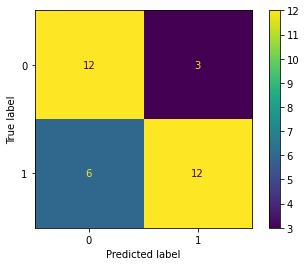

(0.7272727272727273, 0.7272727272727273, 0.7272727272727273, None)


In [40]:
assess_classification_model(y_true, y_pred)

In [44]:
"""
Trumpet: 1
Cello  : 0
"""
y_test.value_counts()

1    18
0    15
Name: y_label, dtype: int64

# Unboxing SGD Classifier

In [45]:
#the model above wasn't bad; unfortunately any more than 100 wav files at a time took too much memory to train
#the SGD Classifier allows us to incrementally train a model
#SGD has numerous parameters, so we're going to see how well it does out of the box with sample size of 100 audio files (~67 after making train/test partition)


In [ ]:
"""
600 audio files
400/200 train/test
567/33
400 / 33


2nd idea:
Get min and max from first batch, then loop throguh batches and incrementally train

Fit pipeline with normalizer, normfft, minmax on first 67 training cases
For each batch:
    train_batch = pipe.predict(batch)
    sgd.partial_fit(train_batch)


3rd idea:
Remove sgd and minmax from pipeline
fit pipeline on first batch
for each batch:
    fft_batch = pipe.predict(batch)
    minmax.partial_fit(fft_batch) #this keeps track of and holds min/max value of each fft freq
    
now add already fit minmax to pipeline
fpr each batch:
    fft_batch = pipe.predict(batch)
    scaled_batch = minmax.predict(train_batch)
    sgd.partial_fit(scaled_batch)
"""

In [56]:
from sklearn.linear_model import SGDClassifier
sgd_pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('normfft', NormFFT(MAX_SAMPLE_SIZE)),
                 ('minmaxscaler', MinMaxScaler()),
                 ('sgd', SGDClassifier())
                ])


In [57]:
sgd_pipe.fit(np.hstack(X_train).reshape(len(X_train),-1), y_train)

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('normfft', NormFFT(n=1323000)), ('sgd', SGDClassifier())])

In [58]:
sgd_y_pred = sgd_pipe.predict(np.hstack(X_test).reshape(len(X_test),-1))

y_true
[1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0]
y_pred
[0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0]


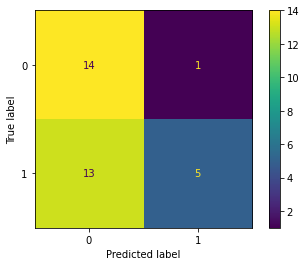

(0.5757575757575758, 0.5757575757575758, 0.5757575757575758, None)


In [59]:
assess_classification_model(y_true, sgd_y_pred)

In [60]:
target_df.loc[2276]['fname']

'C:\\Users\\kbk17\\kaggle audio data\\audio_train\\3e2bddda.wav'

In [61]:
# False trumpet 2276    
# False cello 9383    
y_test

2793    1
5074    0
5143    1
2276    0
1291    0
9383    1
8770    0
5433    1
1325    0
4400    1
2229    1
7577    0
6610    1
5125    1
3642    0
1118    1
6581    1
5108    0
8810    0
5250    0
2151    1
1259    1
5       0
9417    0
1423    1
7024    1
5291    0
1602    1
7518    1
7218    0
8778    1
9198    1
9402    0
Name: y_label, dtype: int64

In [99]:
#implementing idea 3 from above cell
from sklearn.linear_model import SGDClassifier
truncated_sgd_pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('normfft', NormFFT(MAX_SAMPLE_SIZE)),
                ])

In [63]:
full_df = merged_df

In [66]:
train, test = train_test_split(full_df, test_size=0.33, random_state=42, stratify=full_df["label"])

In [114]:
def get_batch_number(row):
    return randrange(1,9)

In [76]:
from random import randrange
train["batch_number"] = train.apply(batch_number, axis=1)

In [78]:
train['batch_number'].value_counts()

7    58
4    54
1    53
3    51
5    51
6    49
2    44
8    42
Name: batch_number, dtype: int64

In [85]:
batch_df = train[train['batch_number']==1].copy()

In [86]:
batch_df["samples"] = batch_df["fname"].apply(loadWaveToArray)

In [94]:
batch_df["samples"] = batch_df["samples"].apply(pad_samples)

In [96]:
batch_X = np.hstack(batch_df["samples"]).reshape(len(batch_df),-1)
batch_X

array([[    -3,      8,      5, ..., -32768, -32768, -32768],
       [    -1,     -1,     -1, ..., -32768, -32768, -32768],
       [   -13,   -126,   -136, ..., -32768, -32768, -32768],
       ...,
       [    28,     25,     26, ..., -32768, -32768, -32768],
       [    -6,     -1,      0, ..., -32768, -32768, -32768],
       [     1,      0,     -1, ..., -32768, -32768, -32768]], dtype=int16)

In [87]:
batch_y = batch_df["label"].str.lower().map({"cello":0, "trumpet":1})
batch_y

5535    1
5262    1
8708    0
967     1
3628    1
1189    0
9198    1
7953    1
2872    0
9417    0
3964    1
4694    1
609     1
1799    0
6610    1
6129    0
7781    0
5706    0
2170    1
7979    0
905     1
8077    1
6594    0
6134    0
1139    0
1295    1
217     1
6468    1
3048    1
7970    1
366     0
464     1
7735    0
5074    0
3978    1
7549    1
2390    1
2193    1
7487    1
8231    0
1690    1
7743    0
7024    1
2106    0
1322    0
8329    1
4297    1
6057    1
8987    0
1695    0
1718    0
1033    0
1215    1
Name: label, dtype: int64

In [100]:
truncated_sgd_pipe.fit(batch_X, batch_y)

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('normfft', NormFFT(n=1323000))])

In [103]:
minmaxscaler= MinMaxScaler()

In [105]:
minmaxscaler.data_min_

AttributeError: 'MinMaxScaler' object has no attribute 'data_min_'

In [107]:
# Fit the min max scaler

for batch_number in range(1,9):
    batch_df = train[train['batch_number']==batch_number].copy()
    batch_df["samples"] = batch_df["fname"].apply(loadWaveToArray)
    batch_df["samples"] = batch_df["samples"].apply(pad_samples)
    batch_X = np.hstack(batch_df["samples"]).reshape(len(batch_df),-1)
    batch_y = batch_df["label"].str.lower().map({"cello":0, "trumpet":1})
    fft_batch = truncated_sgd_pipe.transform(batch_X)
    minmaxscaler.partial_fit(fft_batch)
    print(minmaxscaler.data_min_)
    

[122616.26309204  14109.40351061  14101.48206303 ...   9694.16292157
  14101.48206303  14109.40351061]
[106966.99884033  14109.40351061  14101.48206303 ...   6173.16205063
  14101.48206303  14109.40351061]
[106966.99884033  14109.40351061  14101.48206303 ...   6173.16205063
  14101.48206303  14109.40351061]
[4.76517886e+04 1.41094035e+04 1.41014821e+04 ... 4.78916320e+00
 1.41014821e+04 1.41094035e+04]
[4.76517886e+04 1.41094035e+04 1.41014821e+04 ... 4.78916320e+00
 1.41014821e+04 1.41094035e+04]
[4.76517886e+04 1.41094035e+04 1.41014821e+04 ... 4.78916320e+00
 1.41014821e+04 1.41094035e+04]
[4.76517886e+04 1.41094035e+04 4.41422442e+03 ... 4.78916320e+00
 4.41422442e+03 1.41094035e+04]
[4.76517886e+04 1.41094035e+04 4.41422442e+03 ... 4.78916320e+00
 4.41422442e+03 1.41094035e+04]


In [108]:
minmaxscaler.data_max_

array([1308887.95541382,  421060.13561611,  210530.22904005, ...,
        140372.49927146,  210530.22904005,  421060.13561611])

In [112]:
sgd = SGDClassifier() 
for batch_number in range(1,9):
    batch_df = train[train['batch_number']==batch_number].copy()
    batch_df["samples"] = batch_df["fname"].apply(loadWaveToArray)
    batch_df["samples"] = batch_df["samples"].apply(pad_samples)
    batch_X = np.hstack(batch_df["samples"]).reshape(len(batch_df),-1)
    batch_y = batch_df["label"].str.lower().map({"cello":0, "trumpet":1})
    fft_batch = truncated_sgd_pipe.transform(batch_X)
    scaled_batch = minmaxscaler.transform(fft_batch)
    sgd.partial_fit(scaled_batch, batch_y, [0,1])
    print(sgd.coef_)
    

[[-14.86961757 -12.85453546 -10.18354388 ... -19.93330387 -10.18354388
  -12.85453546]]
[[  4.29461845 -14.58454301  -4.05047739 ... -20.88556008  -4.05047739
  -14.58454301]]
[[-12.83522632 -39.34636162 -36.86481305 ... -58.49028142 -36.86481305
  -39.34636162]]
[[-13.61437361 -66.08713368 -92.53403383 ... -78.88437591 -92.53403383
  -66.08713368]]
[[  -0.5996645   -75.58274345 -103.68330549 ...  -78.84520924
  -103.68330549  -75.58274345]]
[[ 15.50553555 -73.10467456 -93.26209613 ... -73.59069787 -93.26209613
  -73.10467456]]
[[ 23.54811721 -84.94483857 -89.69184501 ... -84.0263631  -89.69184501
  -84.94483857]]
[[  20.4154247   -92.83368294  -94.69140168 ... -100.73424116
   -94.69140168  -92.83368294]]


In [115]:
#must first add "batch_number" to test
test["batch_number"] = test.apply(get_batch_number, axis=1)

In [117]:
all_batch_pred_sgd = []
all_batch_y = test["label"].str.lower().map({"cello":0, "trumpet":1})
all_patch_pred_svc = []
for batch_number in range(1,9):
    batch_df = test[test['batch_number']==batch_number].copy()
    batch_df["samples"] = batch_df["fname"].apply(loadWaveToArray)
    batch_df["samples"] = batch_df["samples"].apply(pad_samples)
    batch_X = np.hstack(batch_df["samples"]).reshape(len(batch_df),-1)
    batch_y = batch_df["label"].str.lower().map({"cello":0, "trumpet":1})
    fft_batch = truncated_sgd_pipe.transform(batch_X)
    scaled_batch = minmaxscaler.transform(fft_batch)
    batch_pred = sgd.predict(scaled_batch)
    all_batch_pred_sgd.append(batch_pred)
    #testing older svc on these batches
    svc_patch_pred = pipe.predict(batch_X)
    all_patch_pred_svc.append(svc_patch_pred)

In [129]:
all_batch_pred_sgd = np.concatenate(all_batch_pred_sgd).ravel()
all_batch_pred_svc = np.concatenate(all_patch_pred_svc).ravel()


ValueError: zero-dimensional arrays cannot be concatenated

In [130]:
all_batch_pred_svc = all_patch_pred_svc

y_true
9393    1
32      0
3076    1
1447    0
1542    0
       ..
1387    1
283     0
1157    0
2676    0
8202    0
Name: label, Length: 198, dtype: int64
y_pred
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0]


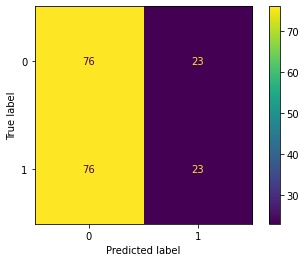

(0.5, 0.5, 0.5, None)


In [128]:
assess_classification_model(all_batch_y, all_batch_pred_sgd)

y_true
9393    1
32      0
3076    1
1447    0
1542    0
       ..
1387    1
283     0
1157    0
2676    0
8202    0
Name: label, Length: 198, dtype: int64
y_pred
[0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1
 0 0 1 0 1 1 0 0 1 0 1 0 0]


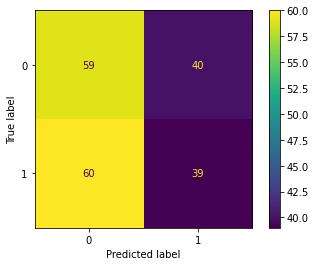

(0.494949494949495, 0.494949494949495, 0.494949494949495, None)


In [132]:
assess_classification_model(all_batch_y, all_batch_pred_svc)

In [1]:
"""
for parameter tuning or training other models (svg, sgd, [any model that can learn incrementally], ...), it would save computation time/effort by:
    make a function to: load the audio samples -> apply preprocessing (normalizing, fft) ->min/max scaling
    and save so not to do each time
    
we're using the most basic features possible now but there are much more sophisticated things (high/low pass filters, wavelets,
mfcc, ...)
""" 

"\nfor parameter tuning or training other models (svg, sgd, [any model that can learn incrementally], ...), it would save computation time/effort by:\n    make a function to: load the audio samples -> apply preprocessing (normalizing, fft) ->min/max scaling\n    and save so not to do each time\n    \nwe're using the most basic features possible now but there are much more sophisticated things (high/low pass filters, wavelets,\nmfcc, ...)\n"

In [41]:
merged_df

fname    label  \
4     C:\Users\kbk17\kaggle audio data\audio_train\0...    Cello   
5     C:\Users\kbk17\kaggle audio data\audio_train\0...    Cello   
14    C:\Users\kbk17\kaggle audio data\audio_train\0...    Cello   
32    C:\Users\kbk17\kaggle audio data\audio_train\0...    Cello   
46    C:\Users\kbk17\kaggle audio data\audio_train\0...    Cello   
...                                                 ...      ...   
9383  C:\Users\kbk17\kaggle audio data\audio_train\f...  Trumpet   
9393  C:\Users\kbk17\kaggle audio data\audio_train\f...  Trumpet   
9401  C:\Users\kbk17\kaggle audio data\audio_train\f...  Trumpet   
9416  C:\Users\kbk17\kaggle audio data\audio_train\f...  Trumpet   
9451  C:\Users\kbk17\kaggle audio data\audio_train\f...  Trumpet   

      manually_verified  
4                     1  
5                     0  
14                    1  
32                    1  
46                    0  
...                 ...  
9383                  0  
9393                  0  
9401                  0  
9416                  1  
9451                  0  

[600 rows x 3 columns]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(merged_df["fname"],merged_df["label"], test_size=0.33, random_state=42, stratify=merged_df["label"])

In [45]:
merged_samples = [loadWaveToArray(path) for path in X_train]

In [21]:
SAMPLE_RATE = 44100

In [48]:
def get_sample_len(sample):
    length_in_seconds = len(sample)/SAMPLE_RATE
    return length_in_seconds

sample_lengths = [get_sample_len(sample) for sample in merged_samples]
sample_lengths 

[2.12,
 20.14,
 1.28,
 14.06,
 7.6,
 3.14,
 3.64,
 5.34,
 6.58,
 3.5,
 7.36,
 6.54,
 28.92,
 6.12,
 14.74,
 4.66,
 5.22,
 14.0,
 2.54,
 20.18,
 3.26,
 12.1,
 7.04,
 12.72,
 10.92,
 6.04,
 1.16,
 2.98,
 6.5,
 23.76,
 7.58,
 9.58,
 1.5,
 4.16,
 1.24,
 16.8,
 10.0,
 0.92,
 5.0,
 5.78,
 1.14,
 6.42,
 6.4,
 4.84,
 5.76,
 12.0,
 6.0,
 1.26,
 1.6,
 0.88,
 8.92,
 5.0,
 2.16,
 5.14,
 8.5,
 12.5,
 6.54,
 4.88,
 9.9,
 27.56,
 4.82,
 0.96,
 1.42,
 0.62,
 2.92,
 5.5,
 0.44,
 14.18,
 6.6,
 5.8,
 1.18,
 2.72,
 4.32,
 4.64,
 0.8,
 6.88,
 13.96,
 4.82,
 3.44,
 2.9,
 5.7,
 8.5,
 26.18,
 21.12,
 0.52,
 10.06,
 1.72,
 5.84,
 1.42,
 0.32,
 0.32,
 2.92,
 1.38,
 4.68,
 1.16,
 4.92,
 9.78,
 9.72,
 3.64,
 6.76,
 5.36,
 0.76,
 3.24,
 5.62,
 1.36,
 12.18,
 6.06,
 5.42,
 8.64,
 0.38,
 2.1,
 6.78,
 2.26,
 1.96,
 5.0,
 0.7,
 8.16,
 3.26,
 14.06,
 0.54,
 4.0,
 1.52,
 2.8,
 0.92,
 8.08,
 6.5,
 8.74,
 5.7,
 6.12,
 7.24,
 7.34,
 7.74,
 11.72,
 5.18,
 3.06,
 7.0,
 5.48,
 3.42,
 1.16,
 3.9,
 6.82,
 9.36,
 3.82,
 1.9,
 5.

In [51]:
sample_lengths = np.array(sample_lengths)
df = pd.DataFrame({"fname":X_train, "slength_in_seconds":sample_lengths, "instrument":y_train})

In [52]:
df.describe()

slength_in_seconds
count          402.000000
mean             6.774527
std              5.756572
min              0.320000
25%              3.060000
50%              5.290000
75%              8.500000
max             28.920000

<AxesSubplot:ylabel='Frequency'>

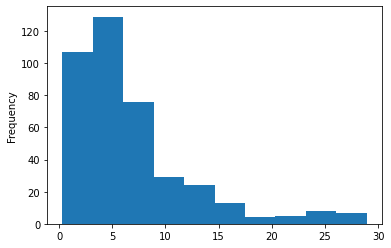

In [54]:
df["slength_in_seconds"].plot(kind='hist')

In [55]:
"""
hesitant to truncate the samples based on the above distribution of lengths
"""
"""
"""

'\n'

In [56]:
from librosa.feature.spectral import spectral_centroid

In [61]:
centroids = [spectral_centroid(y=sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
centroids

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 7.50732422e-03  9.94873047e-03  1.29699707e-02 ... -9.15527344e-05
  6.10351562e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.05175781e-05 -6.10351562e-05 -3.05175781e-05 ...  0.00000000e+00
 -9.15527344e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-7.35473633e-03 -6.50024414e-03 -8.23974609e-04 ... -3.05175781e-05
  0.00000000e+00  3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 3.05175781e-05  0.00000000e+00  0.00000000e+00 ...  3.05175781e-05
  0.00000000e+00 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 2.74658203e-04  3.35693359e-04  3.05175781e-04 ... -6.10351562e-05
  0.00000000e+00 -6.10351562e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.13110352e-02 -3.04565430e-02 -2.84118652e-02 ... -6.10351562e-05
 -3.05175781e-05 -3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-1.15966797e-03 -1.09863281e-03 -1.19018555e-03 ... -6.10351562e-05
 -3.05175781e-05 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-1.37329102e-03 -1.61743164e-03 -1.43432617e-03 ... -3.05175781e-05
 -3.05175781e-05 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.05175781e-05 -3.05175781e-05  0.00000000e+00 ... -3.05175781e-05
 -3.05175781e-05  3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00 -3.05175781e-05 ... -6.10351562e-05
 -3.05175781e-05 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 6.71386719e-04  6.40869141e-04  5.49316406e-04 ...  3.05175781e-05
  0.00000000e+00 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-1.19018555e-03 -1.25122070e-03 -1.22070312e-03 ... -6.10351562e-05
  0.00000000e+00  0.00000000e+00] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 3.78417969e-03 -1.40380859e-03 -2.86865234e-03 ... -3.05175781e-05
 -3.05175781e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.05175781e-05  3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 9.15527344e-05 -3.05175781e-05  6.10351562e-05 ...  3.05175781e-05
  0.00000000e+00 -3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-9.46044922e-04 -1.80053711e-03 -4.21142578e-03 ... -6.10351562e-05
 -3.05175781e-05 -6.10351562e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-6.10351562e-05 -3.05175781e-05 -3.05175781e-05 ... -3.05175781e-05
  0.00000000e+00 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 5.18798828e-04  6.10351562e-04  5.18798828e-04 ... -6.10351562e-05
 -3.05175781e-05  0.00000000e+00] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-6.10351562e-05  0.00000000e+00  3.05175781e-05 ...  0.00000000e+00
  3.05175781e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-1.22070312e-04  6.10351562e-05 -6.10351562e-05 ... -3.05175781e-05
  3.05175781e-05 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-9.46044922e-04 -9.46044922e-04 -9.15527344e-04 ...  3.05175781e-05
 -3.05175781e-05 -3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.05175781e-05 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 1.80053711e-03  2.19726562e-03  1.77001953e-03 ...  0.00000000e+00
 -6.10351562e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-6.86645508e-03 -5.73730469e-03 -6.07299805e-03 ... -3.05175781e-05
  0.00000000e+00  3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[2.74658203e-04 2.74658203e-04 2.74658203e-04 ... 3.05175781e-05
 0.00000000e+00 3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-1.95312500e-03  8.23974609e-04  8.23974609e-04 ... -3.05175781e-05
  3.05175781e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-1.12915039e-03 -1.12915039e-03 -6.10351562e-05 ...  0.00000000e+00
  3.05175781e-05 -3.05175781e-05] as keyword args. From version 0.10 passing these 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-1.77001953e-03 -3.05175781e-05 -3.05175781e-05 ...  0.00000000e+00
 -6.10351562e-05 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-9.15527344e-05  3.05175781e-05 -6.10351562e-05 ...  3.05175781e-05
  0.00000000e+00 -6.10351562e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-9.15527344e-05 -9.15527344e-05 -9.15527344e-05 ... -3.05175781e-05
  0.00000000e+00  0.00000000e+00] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-4.88281250e-04 -4.57763672e-04 -4.57763672e-04 ... -3.05175781e-05
  3.05175781e-05 -6.10351562e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 3.05175781e-05  0.00000000e+00  6.10351562e-05 ... -6.10351562e-05
 -6.10351562e-05 -6.10351562e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 1.12915039e-03  2.68554688e-03  2.74658203e-03 ... -6.10351562e-05
  3.05175781e-05 -3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.32641602e-03 -3.29589844e-03 -3.26538086e-03 ... -3.05175781e-05
 -3.05175781e-05 -6.10351562e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.05175781e-05  3.05175781e-05  3.05175781e-05 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 0.00000000e+00  6.10351562e-05  6.10351562e-05 ...  0.00000000e+00
 -6.10351562e-05 -6.10351562e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-8.85009766e-04 -7.93457031e-04 -8.54492188e-04 ... -3.05175781e-05
  0.00000000e+00 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.26538086e-03 -3.23486328e-03 -3.72314453e-03 ...  0.00000000e+00
 -3.05175781e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.05175781e-05  3.05175781e-05 -3.05175781e-05 ...  0.00000000e+00
  0.00000000e+00  9.15527344e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-6.10351562e-05 -1.22070312e-04  3.05175781e-05 ... -9.15527344e-05
  0.00000000e+00  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 2.07519531e-03 -9.15527344e-05 -6.10351562e-05 ... -6.10351562e-05
 -3.05175781e-05 -9.15527344e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.05175781e-05  0.00000000e+00 -3.05175781e-05 ... -3.05175781e-05
  3.05175781e-05  3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 0.00061035  0.00204468  0.00170898 ... -0.00354004 -0.00219727
 -0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 1.09863281e-03  9.15527344e-05 -6.10351562e-05 ... -3.05175781e-05
  6.10351562e-05  6.10351562e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 1.52587891e-04  1.52587891e-04  2.13623047e-04 ...  0.00000000e+00
 -6.10351562e-05  3.05175781e-05] as keyword args. From version 0.10 passing these as positional argu

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  9.15527344e-05 ... -3.05175781e-05
 -6.10351562e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.05175781e-05 -6.10351562e-05 -6.10351562e-05 ... -3.05175781e-05
  0.00000000e+00 -6.10351562e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-6.10351562e-05 -1.22070312e-04 -9.15527344e-05 ...  3.05175781e-05
  0.00000000e+00 -3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 1.22070312e-04  1.22070312e-04  0.00000000e+00 ...  0.00000000e+00
 -6.10351562e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 2.13623047e-04  9.15527344e-05 -9.15527344e-04 ... -3.05175781e-05
 -3.05175781e-05 -3.05175781e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 1.61743164e-03  1.58691406e-03  1.58691406e-03 ...  0.00000000e+00
 -6.10351562e-05  3.05175781e-05] as keyword args. From version 0.10 passing 

C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.05175781e-05 -3.05175781e-05  0.00000000e+00 ...  3.05175781e-05
 -3.05175781e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[-3.66210938e-04 -3.05175781e-04 -3.35693359e-04 ... -6.10351562e-05
  0.00000000e+00 -6.10351562e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = [spectral_centroid(sample/(2**15), sr=SAMPLE_RATE) for sample in merged_samples]
C:\Users\kbk17\AppData\Local\Temp/ipykernel_3048/2229975582.py:1: FutureWarning: Pass y=[ 3.05175781e-05 -1.22070312e-04 -1.52587891e-04 ... -6.10351562e-05
  0.00000000e+00  3.05175781e-05] as keyword args. From version 0.10 passing 

[array([[ 639.77958402,  607.00108356,  725.04207265,  711.82074193,
          853.93721825,  839.46737225,  779.09716193,  673.53283377,
          650.17723085,  625.52347716,  584.97859506,  600.05906969,
          637.887992  ,  651.36013519,  625.86976054,  614.02109161,
          664.86393603,  662.48517916,  657.15554268,  649.88517469,
          625.42880996,  610.55542708,  615.19452184,  624.53062621,
          622.63463755,  622.09073375,  630.65512   ,  669.04035122,
          658.75586685,  635.69992503,  628.53861147,  623.34460828,
          615.9730699 ,  615.26463342,  649.5605432 ,  671.67386185,
          671.52888821,  709.94173867,  683.30474805,  684.03788162,
          725.78566875,  713.2733956 ,  759.88876864,  775.43195718,
          754.93310329,  761.61791501,  753.60099097,  800.27508778,
          812.84163668,  790.29872387,  790.00801715,  772.55418479,
          799.1661046 ,  781.07852081,  795.06748924,  811.76178301,
          789.46795994,  801.55136

In [62]:
centroids[0].shape

(1, 183)

In [66]:
longest = 0
for centroid in centroids:
    if(centroid.shape[1]>longest):
        longest=centroid.shape[1]
longest

2491

In [ ]:
centroids.

In [68]:
padded_centroids = [pad_samples(centroid, longest, 1, 0) for centroid in centroids]
padded_centroids

[array([[639.77958402, 607.00108356, 725.04207265, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]]),
 array([[10521.87346   , 10633.99457442,  3738.69761594, ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.    

In [75]:
df.sort_values('slength_in_seconds')

fname  \
3964  C:\Users\kbk17\kaggle audio data\audio_train\6aa1b4f0.wav   
4694  C:\Users\kbk17\kaggle audio data\audio_train\7eeb1f03.wav   
2151  C:\Users\kbk17\kaggle audio data\audio_train\3b02b296.wav   
3969  C:\Users\kbk17\kaggle audio data\audio_train\6abeea59.wav   
2     C:\Users\kbk17\kaggle audio data\audio_train\002d256b.wav   
...                                                         ...   
1139  C:\Users\kbk17\kaggle audio data\audio_train\1fbe6ff3.wav   
7284  C:\Users\kbk17\kaggle audio data\audio_train\c5f100e5.wav   
1654  C:\Users\kbk17\kaggle audio data\audio_train\2d871232.wav   
8026  C:\Users\kbk17\kaggle audio data\audio_train\d9824b7b.wav   
8770  C:\Users\kbk17\kaggle audio data\audio_train\ecc5cde3.wav   

      slength_in_seconds instrument  
3964                0.32    Trumpet  
4694                0.32    Trumpet  
2151                0.38    Trumpet  
3969                0.44    Trumpet  
2                   0.44    Trumpet  
...                  ...        ...  
1139               27.22      Cello  
7284               27.56    Trumpet  
1654               28.54      Cello  
8026               28.72      Cello  
8770               28.92      Cello  

[402 rows x 3 columns]

In [74]:
pd.options.display.max_colwidth = None

In [22]:
"""
Departing from path to try a new approach: we're going to split our audio data into smaller (1-2 sec) chunks and train on thsoe
"""
def audio_chunks(audio_data, num_of_samples=SAMPLE_RATE, sr=SAMPLE_RATE):
    # empty list to store new audio chunks formed 
    data=[]
    for i in range(0, len(audio_data), sr):
        # creating the audio chunk by starting with the first second & sliding the 2-second window one step at a time 
        chunk = audio_data[i: i + num_of_samples]
        #dropping any chunk < num_of_samples in length
        if(len(chunk)==num_of_samples):
            data.append(chunk)

    return data

In [79]:
sample_chunks = audio_chunks(merged_samples[34])
sample_chunks

[array([286, 318, 415, ...,   6,   4,   6], dtype=int16)]

In [80]:
merged_samples[34].shape

(54684,)

In [81]:
len(merged_samples[34])

54684

In [87]:
"""
investigating quality of unverified samples
"""
merged_df["manually_verified"].value_counts(normalize=True)

0    0.648333
1    0.351667
Name: manually_verified, dtype: float64

In [89]:
merged_df[merged_df["label"].str.lower()=="trumpet"]["manually_verified"].value_counts(normalize=True)

0    0.713333
1    0.286667
Name: manually_verified, dtype: float64

In [90]:
merged_df[merged_df["label"].str.lower()=="cello"]["manually_verified"].value_counts(normalize=True)

0    0.583333
1    0.416667
Name: manually_verified, dtype: float64

In [92]:
verified_df = merged_df[merged_df["manually_verified"]==1].copy()

In [94]:
verified_df

fname    label  \
4     C:\Users\kbk17\kaggle audio data\audio_train\00353774.wav    Cello   
14    C:\Users\kbk17\kaggle audio data\audio_train\0091fc7f.wav    Cello   
32    C:\Users\kbk17\kaggle audio data\audio_train\011a2185.wav    Cello   
181   C:\Users\kbk17\kaggle audio data\audio_train\05561612.wav    Cello   
246   C:\Users\kbk17\kaggle audio data\audio_train\071803a0.wav    Cello   
...                                                         ...      ...   
8983  C:\Users\kbk17\kaggle audio data\audio_train\f2ad950e.wav  Trumpet   
9173  C:\Users\kbk17\kaggle audio data\audio_train\f79db766.wav  Trumpet   
9200  C:\Users\kbk17\kaggle audio data\audio_train\f8c23e9a.wav  Trumpet   
9269  C:\Users\kbk17\kaggle audio data\audio_train\fa80fe22.wav  Trumpet   
9416  C:\Users\kbk17\kaggle audio data\audio_train\fec180d4.wav  Trumpet   

      manually_verified  
4                     1  
14                    1  
32                    1  
181                   1  
246                   1  
...                 ...  
8983                  1  
9173                  1  
9200                  1  
9269                  1  
9416                  1  

[211 rows x 3 columns]

In [100]:
"""
setting up verified_df to perform chunking
"""
verified_samples_cello = [loadWaveToArray(path) for path in verified_df[verified_df["label"].str.lower()=="cello"]["fname"]]
verified_samples_trumpet = [loadWaveToArray(path) for path in verified_df[verified_df["label"].str.lower()=="trumpet"]["fname"]]

In [106]:
verified_cello_chunks = [audio_chunks(sample) for sample in verified_samples_cello]
verified_trumpet_chunks = [audio_chunks(sample) for sample in verified_samples_trumpet]

In [107]:
flattened_cello_samples = []
for list_of_samples in verified_cello_chunks:
    for array in list_of_samples:
        flattened_cello_samples.append(array)
flattened_cello_samples

[array([ -173,  -162,  -172, ..., -1879, -2278, -2722], dtype=int16),
 array([-3120, -3695, -4379, ...,  5962,  5914,  5779], dtype=int16),
 array([5572, 5327, 5031, ..., 1517, 1587, 1600], dtype=int16),
 array([1546, 1492, 1412, ...,   93,   70,   61], dtype=int16),
 array([ 19,  19,  17, ..., 288, 290, 299], dtype=int16),
 array([  314,   334,   357, ..., -1096, -1287, -1475], dtype=int16),
 array([-1636, -1747, -1830, ...,  1477,  1527,  1585], dtype=int16),
 array([1633, 1669, 1695, ..., 1552, 1511, 1432], dtype=int16),
 array([1365, 1300, 1240, ...,    7,    6,    1], dtype=int16),
 array([  -4,   -2,   -3, ..., -280, -144,   14], dtype=int16),
 array([  196,   384,   573, ..., -1863, -1934, -2010], dtype=int16),
 array([-2098, -2208, -2340, ...,  -958, -1206, -1431], dtype=int16),
 array([-1630, -1802, -1947, ...,  -107,  -112,  -116], dtype=int16),
 array([-124, -128, -133, ...,  -75,  -76,  -79], dtype=int16),
 array([-80, -80, -85, ...,  30,  28,  27], dtype=int16),
 array([  

In [21]:
flattened_trumpet_samples = []
for list_of_samples in verified_trumpet_chunks:
    for array in list_of_samples:
        flattened_trumpet_samples.append(array)
flattened_trumpet_samples

NameError: name 'verified_trumpet_chunks' is not defined

In [120]:

x = np.hstack(flattened_trumpet_samples).reshape(-1, 44100)
column_names = ['sample_'+str(column) for column in range(1,44101)]

In [121]:
trumpet_df = pd.DataFrame(x, columns=column_names)

In [122]:
trumpet_df["label"] = "trumpet"
trumpet_df

sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  sample_7  \
0           5         4         5         5         2         2        -1   
1          32        76       122       157       195       215       203   
2          14        16        23        24        21        20        21   
3        -119       -88       -56       -24        -4        -4       -21   
4          -1         1        -2         1        -2         0         1   
..        ...       ...       ...       ...       ...       ...       ...   
505     -2568     -2887     -3145     -3353     -3502     -3548     -3454   
506      4778      6112      7539      8714      9101      8374      6638   
507      -821      -794      -786      -791      -804      -829      -862   
508       602       855      1088      1272      1383      1406      1334   
509      -940      -792      -619      -417      -196        35       275   

     sample_8  sample_9  sample_10  ...  sample_44092  sample_44093  \
0          -4       -11        -19  ...          -139          -158   
1         161        95         10  ...           -97          -103   
2          14         9         14  ...          -178          -198   
3         -42       -66        -85  ...            -3            -2   
4           1         1          1  ...          -123          -110   
..        ...       ...        ...  ...           ...           ...   
505     -3192     -2777      -2234  ...            -9           309   
506      4217      1485      -1203  ...          -569          -752   
507      -898      -930       -942  ...         -1356         -1142   
508      1172       929        628  ...          -983         -1038   
509       518       755        992  ...          1657          1949   

     sample_44094  sample_44095  sample_44096  sample_44097  sample_44098  \
0            -171          -171          -159          -129           -86   
1            -107           -97           -76           -57           -40   
2            -205          -203          -197          -193          -180   
3               0            -1             0            -2             1   
4            -103           -97           -92           -89           -85   
..            ...           ...           ...           ...           ...   
505           619           926          1249          1633          2135   
506          -905         -1004         -1046         -1035          -987   
507          -934          -727          -522          -316          -107   
508         -1100         -1156         -1200         -1214         -1197   
509          2265          2584          2850          3002          2979   

     sample_44099  sample_44100    label  
0             -45            -7  trumpet  
1             -16             2  trumpet  
2            -163          -143  trumpet  
3               3             2  trumpet  
4             -80           -80  trumpet  
..            ...           ...      ...  
505          2796          3669  trumpet  
506          -924          -866  trumpet  
507           113           349  trumpet  
508         -1147         -1061  trumpet  
509          2755          2344  trumpet  

[510 rows x 44101 columns]

In [123]:
y = np.hstack(flattened_cello_samples).reshape(-1, 44100)
column_names = ['sample_'+str(column) for column in range(1,44101)]
cello_df = pd.DataFrame(y, columns=column_names)
cello_df["label"] = "cello"
cello_df

sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  sample_7  \
0        -173      -162      -172      -142      -170      -139      -139   
1       -3120     -3695     -4379     -4993     -5557     -6205     -6901   
2        5572      5327      5031      4757      4433      4016      3734   
3        1546      1492      1412      1324      1153       956       799   
4          19        19        17        17        16        16        16   
..        ...       ...       ...       ...       ...       ...       ...   
640     -1111     -1308     -1497     -1677     -1847     -2018     -2189   
641     -1418     -1572     -1710     -1803     -1882     -1944     -2012   
642       154       -99      -338      -573      -799     -1024     -1244   
643     -1423     -1180      -965      -720      -426      -170        32   
644       -67       -65       -67       -66       -63       -65       -64   

     sample_8  sample_9  sample_10  ...  sample_44092  sample_44093  \
0        -133      -116       -120  ...          1098           353   
1       -7535     -8123      -8492  ...          4481          4761   
2        3336      2967       2478  ...          1228          1249   
3         666       573        381  ...            96           104   
4          17        17         17  ...           235           272   
..        ...       ...        ...  ...           ...           ...   
640     -2352     -2518      -2706  ...           240           122   
641     -2075     -2137      -2220  ...          2105          1967   
642     -1455     -1653      -1841  ...         -2865         -2768   
643       184       285        312  ...           -59           -62   
644       -65       -62        -60  ...           -72           -70   

     sample_44094  sample_44095  sample_44096  sample_44097  sample_44098  \
0            -190          -570         -1024         -1456         -1879   
1            5130          5505          5742          5871          5962   
2            1270          1258          1305          1387          1517   
3             105           110            91           102            93   
4             296           307           306           293           288   
..            ...           ...           ...           ...           ...   
640           -31          -233          -461          -686          -888   
641          1799          1617          1413          1182           938   
642         -2724         -2664         -2511         -2294         -2087   
643           -63           -63           -66           -65           -66   
644           -67           -66           -63           -66           -65   

     sample_44099  sample_44100  label  
0           -2278         -2722  cello  
1            5914          5779  cello  
2            1587          1600  cello  
3              70            61  cello  
4             290           299  cello  
..            ...           ...    ...  
640         -1074         -1264  cello  
641           682           419  cello  
642         -1901         -1682  cello  
643           -67           -67  cello  
644           -64           -60  cello  

[645 rows x 44101 columns]

In [124]:
merged_df = pd.concat([cello_df, trumpet_df])
merged_df

sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  sample_7  \
0        -173      -162      -172      -142      -170      -139      -139   
1       -3120     -3695     -4379     -4993     -5557     -6205     -6901   
2        5572      5327      5031      4757      4433      4016      3734   
3        1546      1492      1412      1324      1153       956       799   
4          19        19        17        17        16        16        16   
..        ...       ...       ...       ...       ...       ...       ...   
505     -2568     -2887     -3145     -3353     -3502     -3548     -3454   
506      4778      6112      7539      8714      9101      8374      6638   
507      -821      -794      -786      -791      -804      -829      -862   
508       602       855      1088      1272      1383      1406      1334   
509      -940      -792      -619      -417      -196        35       275   

     sample_8  sample_9  sample_10  ...  sample_44092  sample_44093  \
0        -133      -116       -120  ...          1098           353   
1       -7535     -8123      -8492  ...          4481          4761   
2        3336      2967       2478  ...          1228          1249   
3         666       573        381  ...            96           104   
4          17        17         17  ...           235           272   
..        ...       ...        ...  ...           ...           ...   
505     -3192     -2777      -2234  ...            -9           309   
506      4217      1485      -1203  ...          -569          -752   
507      -898      -930       -942  ...         -1356         -1142   
508      1172       929        628  ...          -983         -1038   
509       518       755        992  ...          1657          1949   

     sample_44094  sample_44095  sample_44096  sample_44097  sample_44098  \
0            -190          -570         -1024         -1456         -1879   
1            5130          5505          5742          5871          5962   
2            1270          1258          1305          1387          1517   
3             105           110            91           102            93   
4             296           307           306           293           288   
..            ...           ...           ...           ...           ...   
505           619           926          1249          1633          2135   
506          -905         -1004         -1046         -1035          -987   
507          -934          -727          -522          -316          -107   
508         -1100         -1156         -1200         -1214         -1197   
509          2265          2584          2850          3002          2979   

     sample_44099  sample_44100    label  
0           -2278         -2722    cello  
1            5914          5779    cello  
2            1587          1600    cello  
3              70            61    cello  
4             290           299    cello  
..            ...           ...      ...  
505          2796          3669  trumpet  
506          -924          -866  trumpet  
507           113           349  trumpet  
508         -1147         -1061  trumpet  
509          2755          2344  trumpet  

[1155 rows x 44101 columns]

In [126]:
!pip install pyarrow

You should consider upgrading via the 'c:\users\kbk17\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 17.9/17.9 MB 4.4 MB/s eta 0:00:00


In [127]:
merged_df.to_parquet("trumpet_cello_verified_chunks.parquet")

In [129]:
from sklearn.svm import SVC
pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('normfft', NormFFT(1*SAMPLE_RATE)),
                 ('minmaxscaler', MinMaxScaler()),
                 ('svc', SVC())
                ])

In [7]:
#run these 1*
merged_df = pd.read_parquet("trumpet_cello_verified_chunks.parquet")

In [8]:
merged_df

sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  sample_7  \
0        -173      -162      -172      -142      -170      -139      -139   
1       -3120     -3695     -4379     -4993     -5557     -6205     -6901   
2        5572      5327      5031      4757      4433      4016      3734   
3        1546      1492      1412      1324      1153       956       799   
4          19        19        17        17        16        16        16   
..        ...       ...       ...       ...       ...       ...       ...   
505     -2568     -2887     -3145     -3353     -3502     -3548     -3454   
506      4778      6112      7539      8714      9101      8374      6638   
507      -821      -794      -786      -791      -804      -829      -862   
508       602       855      1088      1272      1383      1406      1334   
509      -940      -792      -619      -417      -196        35       275   

     sample_8  sample_9  sample_10  ...  sample_44092  sample_44093  \
0        -133      -116       -120  ...          1098           353   
1       -7535     -8123      -8492  ...          4481          4761   
2        3336      2967       2478  ...          1228          1249   
3         666       573        381  ...            96           104   
4          17        17         17  ...           235           272   
..        ...       ...        ...  ...           ...           ...   
505     -3192     -2777      -2234  ...            -9           309   
506      4217      1485      -1203  ...          -569          -752   
507      -898      -930       -942  ...         -1356         -1142   
508      1172       929        628  ...          -983         -1038   
509       518       755        992  ...          1657          1949   

     sample_44094  sample_44095  sample_44096  sample_44097  sample_44098  \
0            -190          -570         -1024         -1456         -1879   
1            5130          5505          5742          5871          5962   
2            1270          1258          1305          1387          1517   
3             105           110            91           102            93   
4             296           307           306           293           288   
..            ...           ...           ...           ...           ...   
505           619           926          1249          1633          2135   
506          -905         -1004         -1046         -1035          -987   
507          -934          -727          -522          -316          -107   
508         -1100         -1156         -1200         -1214         -1197   
509          2265          2584          2850          3002          2979   

     sample_44099  sample_44100    label  
0           -2278         -2722    cello  
1            5914          5779    cello  
2            1587          1600    cello  
3              70            61    cello  
4             290           299    cello  
..            ...           ...      ...  
505          2796          3669  trumpet  
506          -924          -866  trumpet  
507           113           349  trumpet  
508         -1147         -1061  trumpet  
509          2755          2344  trumpet  

[1155 rows x 44101 columns]

In [8]:
#2*
merged_df["label"] = merged_df["label"].map({"cello": 0, "trumpet": 1})

In [9]:
#3*
from sklearn.model_selection import train_test_split
train, test = train_test_split(merged_df, train_size=0.66)
train

sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  sample_7  \
64      -2645     -2181     -1718      -839       231       892       939   
222        -3        -4        -4        -4        -4        -4        -2   
290        98       -91       649     -1457     -2523     -1357      -543   
494       -26       -26       -26       -23       -22       -21       -17   
410      -356      -375      -391      -407      -423      -441      -454   
..        ...       ...       ...       ...       ...       ...       ...   
65         10        11        11         9        10        10        11   
483       190       311       437       554       652       709       719   
347      -149      -184      -221      -251      -270      -268      -249   
119       585       923      1260      1598      1935      2257      2545   
164     -1169     -1156     -1110     -1042      -954      -844      -710   

     sample_8  sample_9  sample_10  ...  sample_44092  sample_44093  \
64        700       505        469  ...          3060          3003   
222        -2        -4         -2  ...         -3481         -5381   
290      -104       477        631  ...          -142          -990   
494       -16       -15        -13  ...           -27           -27   
410      -460      -453       -428  ...          2567          2699   
..        ...       ...        ...  ...           ...           ...   
65         10        10          7  ...           707           706   
483       700       658        597  ...          -273          -356   
347      -212      -159        -93  ...           -65            -5   
119      2798      3029       3213  ...            -2            -1   
164      -571      -433       -326  ...          -216          -283   

     sample_44094  sample_44095  sample_44096  sample_44097  sample_44098  \
64           2162           184         -2211         -3915         -4434   
222         -6413         -6776         -6663         -6191         -5410   
290         -2226         -2697         -1594          -783          -598   
494           -26           -27           -28           -28           -27   
410          2736          2657          2443          2129          1729   
..            ...           ...           ...           ...           ...   
65            693           668           641           608           569   
483          -410          -435          -436          -413          -373   
347            50           101           144           176           193   
119            -3            -4            -1            -1            -1   
164          -363          -436          -507          -584          -692   

     sample_44099  sample_44100  label  
64          -4060         -3375      1  
222         -4349         -3091      1  
290           727          1512      1  
494           -25           -29      0  
410          1274           774      1  
..            ...           ...    ...  
65            534           501      0  
483          -317          -250      1  
347           196           183      1  
119            -3            -2      1  
164          -819          -952      1  

[762 rows x 44101 columns]

In [144]:
pipe.fit(X=train[column_names], y=train["label"])

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('normfft', NormFFT(n=44100)), ('minmaxscaler', MinMaxScaler()),
                ('svc', SVC())])

In [11]:
#4*
y_true = test["label"]

In [146]:
y_pred = pipe.predict(test[column_names])

y_true
281    1
278    0
244    0
306    0
14     1
      ..
372    0
470    0
483    0
161    0
395    1
Name: label, Length: 393, dtype: int64
y_pred
[1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1
 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1
 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1]


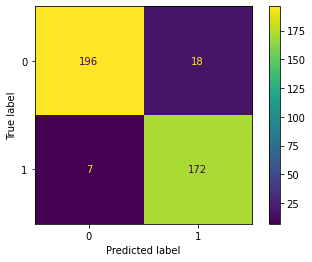

(0.9363867684478372, 0.9363867684478372, 0.9363867684478372, None)


In [147]:
assess_classification_model(y_true, y_pred)

In [62]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [153]:
tree_pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('normfft', NormFFT(1*SAMPLE_RATE)),
                 ('minmaxscaler', MinMaxScaler()),
                 ('dtc', DecisionTreeClassifier())
                ])

In [154]:
tree_pipe.fit(X=train[column_names], y=train["label"])

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('normfft', NormFFT(n=44100)), ('minmaxscaler', MinMaxScaler()),
                ('dtc', DecisionTreeClassifier())])

In [155]:
y_pred_tree = tree_pipe.predict(test[column_names])

y_true
281    1
278    0
244    0
306    0
14     1
      ..
372    0
470    0
483    0
161    0
395    1
Name: label, Length: 393, dtype: int64
y_pred
[1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1
 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1]


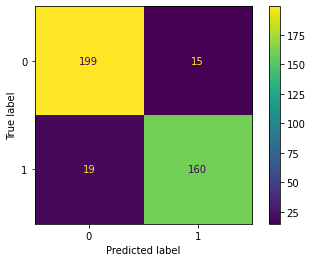

(0.9134860050890585, 0.9134860050890585, 0.9134860050890585, None)


In [156]:
assess_classification_model(y_true,y_pred_tree)

[Text(210.8, 205.35999999999999, 'X[21] <= 0.035\ngini = 0.491\nsamples = 762\nvalue = [431, 331]'),
 Text(142.6, 181.2, 'X[143] <= 0.004\ngini = 0.326\nsamples = 405\nvalue = [83, 322]'),
 Text(99.2, 157.04, 'X[42289] <= 0.002\ngini = 0.201\nsamples = 361\nvalue = [41, 320]'),
 Text(49.6, 132.88, 'X[36301] <= 0.001\ngini = 0.491\nsamples = 46\nvalue = [26, 20]'),
 Text(24.8, 108.72, 'X[13303] <= 0.001\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(12.4, 84.56, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(37.2, 84.56, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(74.4, 108.72, 'X[38959] <= 0.008\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(62.0, 84.56, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(86.8, 84.56, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(148.8, 132.88, 'X[202] <= 0.066\ngini = 0.091\nsamples = 315\nvalue = [15, 300]'),
 Text(124.0, 108.72, 'X[9721] <= 0.533\ngini = 0.057\nsamples = 308\nvalue = [9, 299]'),
 Text(111.60000000000001,

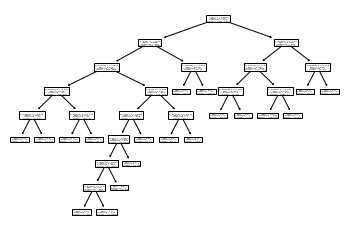

In [158]:
tree.plot_tree(tree_pipe["dtc"])

In [172]:
tree_pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('wavelet', WaveletTransformer()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('dtc', DecisionTreeClassifier())
                ])

In [173]:
tree_pipe.fit(X=train[column_names], y=train["label"])

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('wavelet', WaveletTransformer()),
                ('minmaxscaler', MinMaxScaler()),
                ('dtc', DecisionTreeClassifier())])

In [174]:
y_pred_tree = tree_pipe.predict(test[column_names])

y_true
281    1
278    0
244    0
306    0
14     1
      ..
372    0
470    0
483    0
161    0
395    1
Name: label, Length: 393, dtype: int64
y_pred
[1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1
 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0
 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0]


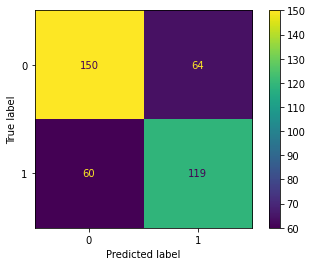

(0.6844783715012722, 0.6844783715012722, 0.6844783715012722, None)


In [175]:
assess_classification_model(y_true, y_pred_tree)

# Parameter search

In [178]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 
              'splitter': ['random', 'best'], 
              'max_depth': [None, 3, 7, 15, 31],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 10, 15]}
              

cv_pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('wavelet', WaveletTransformer()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('cv', GridSearchCV(DecisionTreeClassifier(), parameters))
                ])

In [179]:
cv_pipe.fit(X=train[column_names], y=train["label"])

c:\users\kbk17\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\kbk17\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\kbk17\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\users\kbk17\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py", 

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('wavelet', WaveletTransformer()),
                ('minmaxscaler', MinMaxScaler()),
                ('cv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy',
                                                        'log_loss'],
                                          'max_depth': [None, 3, 7, 15, 31],
                                          'min_samples_leaf': [1, 10, 15],
                                          'min_samples_split': [2, 5, 10],
                                          'splitter': ['random', 'best']}))])

In [180]:
cv_pipe["cv"].best_params_

{'criterion': 'entropy',
 'max_depth': 31,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'splitter': 'best'}

In [181]:
cv_pred = cv_pipe.predict(test[column_names])

y_true
281    1
278    0
244    0
306    0
14     1
      ..
372    0
470    0
483    0
161    0
395    1
Name: label, Length: 393, dtype: int64
y_pred
[1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1
 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0
 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0
 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1]


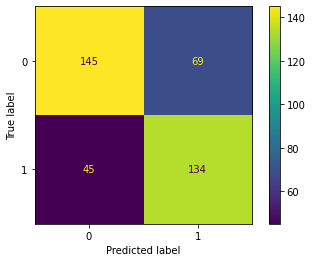

(0.7099236641221374, 0.7099236641221374, 0.7099236641221375, None)


In [182]:
assess_classification_model(y_true, cv_pred)

In [ ]:
3 FN, 12 FP
~96.1%

# Attempt with Gradient Descent

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
                'loss': ['log'],
                'penalty': ['l2', 'l1', 'elasticnet'],
                'alpha': [0.0001, 0.01, 0.1, 1, 10 ],
                'l1_ratio': [0, 0.15, 0.5, 1],
                'warm_start': [True, False]
             }
                
gd_pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('nfft', NormFFT()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('gdc', GridSearchCV(SGDClassifier(), parameters))
                ])

In [12]:
#5*
column_names = ['sample_'+str(column) for column in range(1,44101)]

In [38]:
gd_pipe.fit(X=train[column_names], y=train["label"])

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('nfft', NormFFT()), ('minmaxscaler', MinMaxScaler()),
                ('gdc',
                 GridSearchCV(estimator=SGDClassifier(),
                              param_grid={'alpha': [0.0001, 0.01, 0.1, 1, 10],
                                          'l1_ratio': [0, 0.15, 0.5, 1],
                                          'loss': ['log'],
                                          'penalty': ['l2', 'l1', 'elasticnet'],
                                          'warm_start': [True, False]}))])

In [ ]:
#best predictors with wavelet
"""
{'alpha': 10,
 'l1_ratio': 0,
 'loss': 'log',
 'penalty': 'l2',
 'warm_start': False}
"""

In [39]:
gd_pipe["gdc"].best_params_

{'alpha': 0.0001,
 'l1_ratio': 0.15,
 'loss': 'log',
 'penalty': 'l2',
 'warm_start': True}

In [40]:
gd_pred = gd_pipe.predict(test[column_names])

In [ ]:
"""
assess_classification_model() with wavelet

234 0
159 0
"""

y_true
106    1
238    0
300    1
422    0
501    0
      ..
96     1
425    1
535    0
500    1
61     1
Name: label, Length: 393, dtype: int64
y_pred
[1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0
 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1]


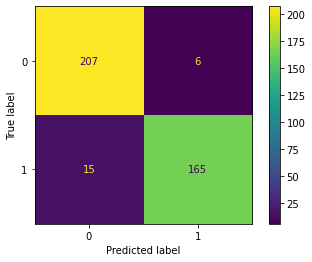

(0.9465648854961832, 0.9465648854961832, 0.9465648854961832, None)


In [41]:
assess_classification_model(y_true, gd_pred)

# Attempt with Gradient Boosting

In [ ]:
"""Recall: the idea of GB is to train many different trees but with different, randomly chosen subsets 
of the data and features. The trees make their predictions in order. So the second tree tries to 
correct the previous tree's answer based on its subset of data/features, the third tries to correct the second's, and so on
"""

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
                'loss': ['log_loss', 'deviance', 'exponential'],
                'learning_rate': [0.01, 0.1, 1],
                'n_estimators': [50, 100, 200],
                'subsample': [0.01, 1],
                'criterion': ['friedman_mse', 'squared_error', 'mse'],
                'min_samples_split': [2, 10],
                'min_samples_leaf': [1, 10],
                'max_depth': [1, 3, 7]
             }
                
gbc_pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('nfft', NormFFT()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('cv', GridSearchCV(GradientBoostingClassifier(), parameters))
                ])

In [15]:
gbc_pipe.fit(X=train[column_names], y=train["label"])

KeyboardInterrupt: 

In [ ]:
gbc_pipe["cv"].best_params_

In [ ]:
gbc_pred = gbc_pipe.predict(test[column_names])

In [ ]:
assess_classification_model(y_true, gbc_pred)

# Attempt with K-Neighbors Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
                "n_neighbors": [1, 5, 10],
                "leaf_size": [15, 30, 45],
             }
                
knc_pipe = Pipeline([('normalizer', Normalizer(16, True)), 
                 ('nfft', NormFFT()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('knc', GridSearchCV(KNeighborsClassifier(), parameters))
                ])

In [16]:
knc_pipe.fit(X=train[column_names], y=train["label"])

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('nfft', NormFFT()), ('minmaxscaler', MinMaxScaler()),
                ('knc',
                 GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid={'leaf_size': [15, 30, 45],
                                          'n_neighbors': [1, 5, 10]}))])

In [19]:
knc_pipe["knc"].best_params_

{'leaf_size': 15, 'n_neighbors': 1}

In [20]:
knc_pred = knc_pipe.predict(test[column_names])

y_true
276    0
20     1
499    1
384    1
175    1
      ..
59     0
387    0
186    1
223    1
398    1
Name: label, Length: 393, dtype: int64
y_pred
[0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1
 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1
 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1]


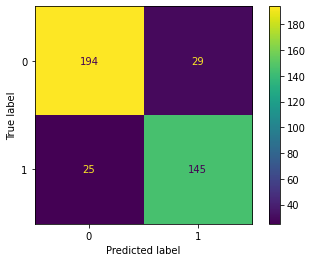

(0.8625954198473282, 0.8625954198473282, 0.8625954198473282, None)


In [23]:
assess_classification_model(y_true, knc_pred)

# Adding a third sound to the mix

In [18]:
data

fname         label  manually_verified
0     00044347.wav        Hi-hat                  0
1     001ca53d.wav     Saxophone                  1
2     002d256b.wav       Trumpet                  0
3     0033e230.wav  Glockenspiel                  1
4     00353774.wav         Cello                  1
...            ...           ...                ...
9468  ffec59fb.wav     Fireworks                  0
9469  fff37590.wav        Hi-hat                  0
9470  fff44ac6.wav      Laughter                  0
9471  fff6a13d.wav         Chime                  0
9472  fff81f55.wav         Cough                  1

[9473 rows x 3 columns]

In [19]:
fireworks_files = data[data["label"]=="Fireworks"]
fireworks_files

fname      label  manually_verified
51    0193042e.wav  Fireworks                  0
53    019aae9d.wav  Fireworks                  0
81    0244bb9e.wav  Fireworks                  0
93    027aee2a.wav  Fireworks                  1
114   034beca1.wav  Fireworks                  0
...            ...        ...                ...
9375  fd5b4002.wav  Fireworks                  0
9378  fd6a8735.wav  Fireworks                  1
9439  ff402c67.wav  Fireworks                  1
9449  ff8e95db.wav  Fireworks                  0
9468  ffec59fb.wav  Fireworks                  0

[300 rows x 3 columns]

In [21]:
cello_df = data[data["label"].str.lower() == "cello"]
trumpet_df = data[data["label"].str.lower() == "trumpet"]
fireworks_df = data[data["label"].str.lower() == "fireworks"]
merged_df = pd.concat([cello_df, trumpet_df, fireworks_df])
merged_df

fname      label  manually_verified
4     00353774.wav      Cello                  1
5     003b91e8.wav      Cello                  0
14    0091fc7f.wav      Cello                  1
32    011a2185.wav      Cello                  1
46    0184c390.wav      Cello                  0
...            ...        ...                ...
9375  fd5b4002.wav  Fireworks                  0
9378  fd6a8735.wav  Fireworks                  1
9439  ff402c67.wav  Fireworks                  1
9449  ff8e95db.wav  Fireworks                  0
9468  ffec59fb.wav  Fireworks                  0

[900 rows x 3 columns]

In [27]:
test2 = [["one", "two", "one", "three"], [1, 2, 1, 3], ["bleep", "bloop", "bleep", "blah"]]
test2_df = pd.DataFrame(test2, ["words", "numbers", "gibberish"])
test2_df = test2_df.transpose()
test2_df

words numbers gibberish
0    one       1     bleep
1    two       2     bloop
2    one       1     bleep
3  three       3      blah

In [28]:
test3 = test2_df["words"] == "one"
test3

0     True
1    False
2     True
3    False
Name: words, dtype: bool

In [29]:
verified_merge = merged_df[merged_df["manually_verified"] == 1]
verified_merge

fname      label  manually_verified
4     00353774.wav      Cello                  1
14    0091fc7f.wav      Cello                  1
32    011a2185.wav      Cello                  1
181   05561612.wav      Cello                  1
246   071803a0.wav      Cello                  1
...            ...        ...                ...
9088  f581894c.wav  Fireworks                  1
9199  f8c1a609.wav  Fireworks                  1
9248  f9ef92a3.wav  Fireworks                  1
9378  fd6a8735.wav  Fireworks                  1
9439  ff402c67.wav  Fireworks                  1

[286 rows x 3 columns]

In [ ]:
"""
sr = 1
n = 2

x  x  x
------------
--
 --
  --
"""
SAMPLE_RATE=16000
def audio_chunks(audio_data, num_of_samples=SAMPLE_RATE, sr=SAMPLE_RATE):
    # empty list to store new audio chunks formed 
    data=[]
    for i in range(0, len(audio_data), sr):
        # creating the audio chunk by starting with the first second & sliding the 2-second window one step at a time 
        chunk = audio_data[i: i + num_of_samples]
        #dropping any chunk < num_of_samples in length
        if(len(chunk)==num_of_samples):
            data.append(chunk)

    return data

# Discerning between Space bar and letter keys

In [ ]:
"""
1. Load audio data
2. Make pipeline consisting of:
    -normalization
    -fft or wavelet
    -model
3. Set up dataframe containing audio data and target

"""

In [ ]:
import glob
paths = glob.glob("C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\*.wav")
paths

len(paths)

audio = [loadWaveToArray(path) for path in paths]
audio

MAX_SIZE = max([a.shape[0] for a in audio])
MAX_SIZE

lengths = pd.Series([a.shape[0] for a in audio]) / 16000
lengths.plot(kind='hist', bins=150, figsize=(10,10))

lengths.describe()

def pad_samples(a, max_sequence_length, axis, pad_value):
    return np.pad(a, (0,max_sequence_length-a.shape[axis]), 'constant', constant_values=pad_value)

padded_audio = [pad_samples(a, MAX_SIZE, 0, 0) for a in audio]
padded_audio

padded_audio = np.hstack(padded_audio).reshape(len(padded_audio), -1)
padded_audio

X_columns = ['X_'+str(x) for x in range(0, MAX_SIZE)]
padded_df = pd.DataFrame(padded_audio, columns=X_columns)
padded_df

targets = [path.replace("C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\", "").split("_")[0] for path in paths]
targets

padded_df["str_target"] = targets
padded_df["target"] = (padded_df["str_target"] == "[Space]").astype(int)
padded_df["target"] 

padded_df["target"].value_counts()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_df[X_columns],padded_df["target"], test_size=0.2, random_state=42)

parameters = {"num_leaf": [3, 7, 15, 31, 63],
                "bagging_frac": [.25, .5, .75, 1],
                "feature_frac": [.25, .5, .75, 1]
             }
lgb_pipe = Pipeline([('normalizer', Normalizer(8, False)), 
                 ('nfft', NormFFT()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('lgb', lgb.LGBMClassifier())
                ])

lgb_pipe.fit(X_train, y_train)

In [7]:
import glob
paths = glob.glob("C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\*.wav")
paths

['C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\A_10112_1659907810692.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\A_10144_1659907635475.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\A_10198_1659906655058.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\A_1028_1659906264154.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\A_10299_1659905994130.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\A_1032_1659906523095.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\A_10334_1657993457839.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\A_10584_1659906092024.wav',
 'C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sou

In [8]:
len(paths)

2836

In [9]:
audio = [loadWaveToArray(path) for path in paths]
audio

[array([125, 126, 127, ..., 127, 127, 127], dtype=uint8),
 array([128, 128, 127, ..., 123, 123, 122], dtype=uint8),
 array([138, 137, 136, ..., 128, 128, 128], dtype=uint8),
 array([130, 130, 129, ..., 130, 130, 129], dtype=uint8),
 array([127, 126, 127, ..., 129, 129, 129], dtype=uint8),
 array([132, 132, 133, ..., 129, 130, 129], dtype=uint8),
 array([129, 131, 131, ..., 123, 123, 123], dtype=uint8),
 array([128, 126, 125, ..., 130, 129, 130], dtype=uint8),
 array([130, 129, 130, ..., 128, 128, 129], dtype=uint8),
 array([119, 119, 118, ..., 130, 129, 129], dtype=uint8),
 array([130, 132, 133, ..., 130, 130, 129], dtype=uint8),
 array([132, 132, 132, ..., 128, 129, 129], dtype=uint8),
 array([128, 128, 128, ..., 127, 127, 127], dtype=uint8),
 array([130, 130, 130, ..., 124, 123, 123], dtype=uint8),
 array([131, 131, 130, ..., 130, 129, 131], dtype=uint8),
 array([126, 126, 126, ..., 128, 129, 128], dtype=uint8),
 array([128, 129, 127, ..., 127, 128, 128], dtype=uint8),
 array([126, 1

In [10]:
MAX_SIZE = max([a.shape[0] for a in audio])
MAX_SIZE

9873

<AxesSubplot:ylabel='Frequency'>

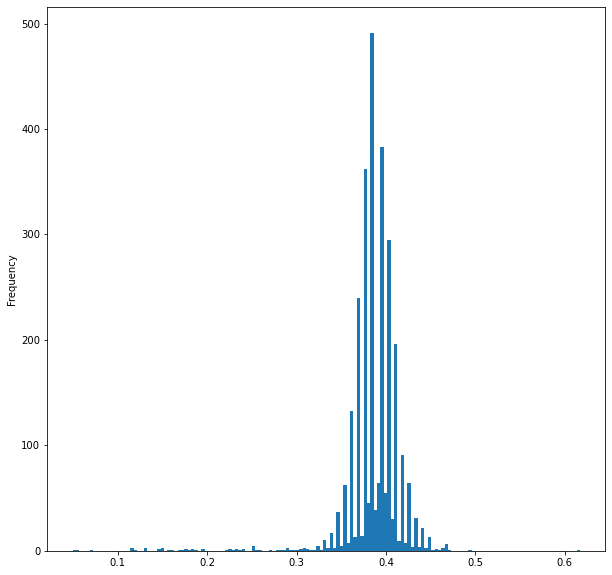

In [11]:
lengths = pd.Series([a.shape[0] for a in audio]) / 16000
lengths.plot(kind='hist', bins=150, figsize=(10,10))

In [12]:
lengths.describe()

count    2836.000000
mean        0.385603
std         0.034284
min         0.049500
25%         0.378063
50%         0.386062
75%         0.402062
max         0.617062
dtype: float64

In [13]:
def pad_samples(a, max_sequence_length, axis, pad_value):
    return np.pad(a, (0,max_sequence_length-a.shape[axis]), 'constant', constant_values=pad_value)

In [14]:
padded_audio = [pad_samples(a, MAX_SIZE, 0, 0) for a in audio]
padded_audio

[array([125, 126, 127, ...,   0,   0,   0], dtype=uint8),
 array([128, 128, 127, ...,   0,   0,   0], dtype=uint8),
 array([138, 137, 136, ...,   0,   0,   0], dtype=uint8),
 array([130, 130, 129, ...,   0,   0,   0], dtype=uint8),
 array([127, 126, 127, ...,   0,   0,   0], dtype=uint8),
 array([132, 132, 133, ...,   0,   0,   0], dtype=uint8),
 array([129, 131, 131, ...,   0,   0,   0], dtype=uint8),
 array([128, 126, 125, ...,   0,   0,   0], dtype=uint8),
 array([130, 129, 130, ...,   0,   0,   0], dtype=uint8),
 array([119, 119, 118, ...,   0,   0,   0], dtype=uint8),
 array([130, 132, 133, ...,   0,   0,   0], dtype=uint8),
 array([132, 132, 132, ...,   0,   0,   0], dtype=uint8),
 array([128, 128, 128, ...,   0,   0,   0], dtype=uint8),
 array([130, 130, 130, ...,   0,   0,   0], dtype=uint8),
 array([131, 131, 130, ...,   0,   0,   0], dtype=uint8),
 array([126, 126, 126, ...,   0,   0,   0], dtype=uint8),
 array([128, 129, 127, ...,   0,   0,   0], dtype=uint8),
 array([126, 1

In [15]:
padded_audio = np.hstack(padded_audio).reshape(len(padded_audio), -1)
padded_audio

array([[125, 126, 127, ...,   0,   0,   0],
       [128, 128, 127, ...,   0,   0,   0],
       [138, 137, 136, ...,   0,   0,   0],
       ...,
       [125, 125, 125, ...,   0,   0,   0],
       [128, 127, 127, ...,   0,   0,   0],
       [128, 129, 129, ...,   0,   0,   0]], dtype=uint8)

In [16]:
X_columns = ['X_'+str(x) for x in range(0, MAX_SIZE)]
padded_df = pd.DataFrame(padded_audio, columns=X_columns)
padded_df

X_0  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  ...  X_9863  X_9864  \
0     125  126  127  128  127  128  128  128  129  129  ...       0       0   
1     128  128  127  127  128  128  127  127  127  127  ...       0       0   
2     138  137  136  137  136  136  137  136  136  137  ...       0       0   
3     130  130  129  130  129  129  128  129  129  129  ...       0       0   
4     127  126  127  126  126  127  125  126  126  124  ...       0       0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...     ...   
2831  128  128  128  129  128  129  129  128  128  128  ...       0       0   
2832  125  125  124  123  122  122  124  124  124  124  ...       0       0   
2833  125  125  125  125  126  126  127  127  127  127  ...       0       0   
2834  128  127  127  126  126  127  127  126  127  126  ...       0       0   
2835  128  129  129  129  129  129  128  128  129  128  ...       0       0   

      X_9865  X_9866  X_9867  X_9868  X_9869  X_9870  X_9871  X_9872  
0          0       0       0       0       0       0       0       0  
1          0       0       0       0       0       0       0       0  
2          0       0       0       0       0       0       0       0  
3          0       0       0       0       0       0       0       0  
4          0       0       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...     ...     ...  
2831       0       0       0       0       0       0       0       0  
2832       0       0       0       0       0       0       0       0  
2833       0       0       0       0       0       0       0       0  
2834       0       0       0       0       0       0       0       0  
2835       0       0       0       0       0       0       0       0  

[2836 rows x 9873 columns]

In [17]:
targets = [path.replace("C:\\Users\\kbk17\\jupyter-notebooks\\Espionage\\Key Classification\\isolated_sounds\\", "").split("_")[0] for path in paths]
targets

['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C'

In [18]:
padded_df["str_target"] = targets
padded_df["target"] = (padded_df["str_target"] == "[Space]").astype(int)
padded_df["target"] 

0       0
1       0
2       0
3       0
4       0
       ..
2831    1
2832    1
2833    1
2834    0
2835    0
Name: target, Length: 2836, dtype: int32

In [19]:
padded_df["target"].value_counts()

0    1499
1    1337
Name: target, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_df[X_columns],padded_df["target"], test_size=0.2, random_state=42)

In [24]:
import lightgbm as lgb
parameters = {"num_leaf": [3, 7, 15, 31, 63],
                "bagging_frac": [.25, .5, .75, 1],
                "feature_frac": [.25, .5, .75, 1]
             }
lgb_pipe = Pipeline([('normalizer', Normalizer(8, False)), 
                 ('nfft', NormFFT()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('lgb', lgb.LGBMClassifier())
                ])

In [25]:
lgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer(nbits=8, signed=False)),
                ('nfft', NormFFT()), ('minmaxscaler', MinMaxScaler()),
                ('lgb', LGBMClassifier())])

In [46]:
y_pred = lgb_pipe.predict_proba(X_test)
y_pred = y_pred[:, 1]

(0.0, 1.05)

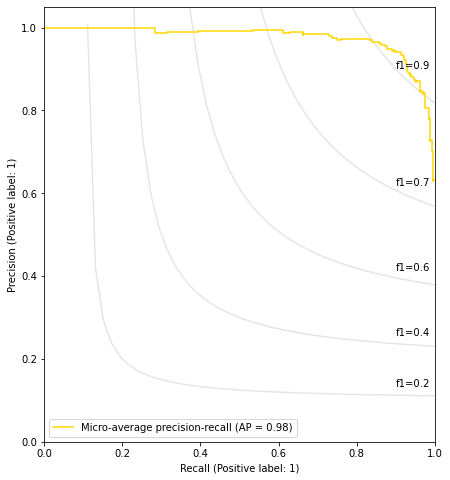

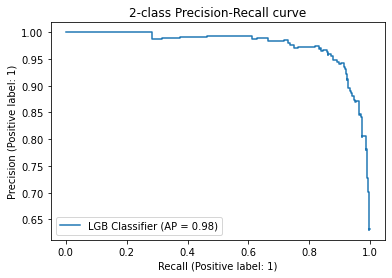

In [53]:
from sklearn.metrics import PrecisionRecallDisplay
f_scores = np.linspace(0.2, 0.9, num=5)
lines, labels = [], []
_, ax = plt.subplots(figsize=(7, 8))
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="LGB Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

In [62]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
fscores = []
from sklearn.metrics import f1_score
for t in thresholds:
    fscores.append(f1_score(y_test, np.where(y_pred > t, 1, 0)))
thresholds[np.argmax(fscores)]

0.5353407481944701

In [64]:
t = 0.5353407481944701
y_pred = np.where(y_pred > t, 1, 0)

y_true
415     0
1596    1
1322    0
2271    1
1966    1
       ..
163     0
1885    1
252     0
1776    1
1644    1
Name: target, Length: 568, dtype: int32
y_pred
[0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0
 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 

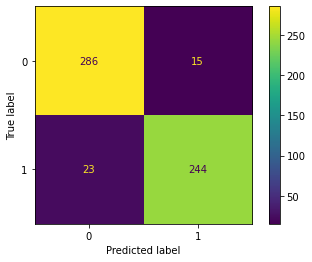

(0.9330985915492958, 0.9330985915492958, 0.9330985915492958, None)


In [65]:
assess_classification_model(y_test, y_pred)

In [1]:
y_pred = lgb_pipe.predict_proba(X_test)

NameError: name 'lgb_pipe' is not defined

In [73]:
import pickle
filename = 'keypress_lgbm_pipeline.sav'
pickle.dump(lgb_pipe, open(filename, 'wb'))

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
parameters = {'loss': ['log'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'alpha': [0.0001, 0.01, 0.1, 1, 10 ],
              'l1_ratio': [0, 0.15, 0.5, 1],
              'warm_start': [True, False]}
                
gd_pipe = Pipeline([('normalizer', Normalizer(8, False)), 
                 ('nfft', NormFFT()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('gdc', GridSearchCV(SGDClassifier(), parameters))
                ])

In [23]:
#need to construct sgd (stochastic gradient descent) pipline
from sklearn.linear_model import SGDClassifier
gd_pipe.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer(nbits=15, signed=True)),
                ('nfft', NormFFT(n=9873)), ('minmaxscaler', MinMaxScaler()),
                ('gdc',
                 GridSearchCV(estimator=SGDClassifier(),
                              param_grid={'alpha': [0.0001, 0.01, 0.1, 1, 10],
                                          'l1_ratio': [0, 0.15, 0.5, 1],
                                          'loss': ['log'],
                                          'penalty': ['l2', 'l1', 'elasticnet'],
                                          'warm_start': [True, False]}))])

In [24]:
gd_pipe["gdc"].best_params_

{'alpha': 0.01,
 'l1_ratio': 0.15,
 'loss': 'log',
 'penalty': 'elasticnet',
 'warm_start': True}

In [25]:
y_pred = gd_pipe.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [26]:
y_test

415     0
1596    1
1322    0
2271    1
1966    1
       ..
163     0
1885    1
252     0
1776    1
1644    1
Name: target, Length: 568, dtype: int32

In [27]:
gd_pipe.predict(X_train)

array([1, 1, 1, ..., 0, 0, 0])

y_true
415     0
1596    1
1322    0
2271    1
1966    1
       ..
163     0
1885    1
252     0
1776    1
1644    1
Name: target, Length: 568, dtype: int32
y_pred
[1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1
 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1
 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1
 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0
 0 1 0 0 0 

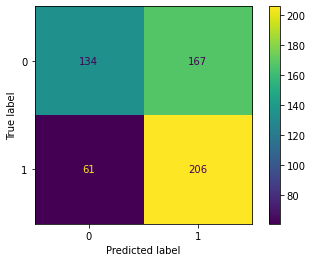

(0.5985915492957746, 0.5985915492957746, 0.5985915492957746, None)


In [28]:
assess_classification_model(y_test, y_pred)

In [44]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
parameters = {#'criterion': ['gini', 'entropy'], 
              'splitter': ['random', 'best'], 
              'max_depth': [None, 3, 7, 15, 31],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 10, 15]}
              

tree_pipe = Pipeline([('normalizer', Normalizer(8, False)), 
                 ('fft', NormFFT(n=MAX_SIZE)),
                 ('minmaxscaler', MinMaxScaler()),
                 ('tree', GridSearchCV(DecisionTreeClassifier(), parameters))
                ])

In [45]:
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer(nbits=8, signed=False)),
                ('fft', NormFFT(n=9873)), ('minmaxscaler', MinMaxScaler()),
                ('tree',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [None, 3, 7, 15, 31],
                                          'min_samples_leaf': [1, 10, 15],
                                          'min_samples_split': [2, 5, 10],
                                          'splitter': ['random', 'best']}))])

In [48]:
tree_pipe["tree"].best_params_

{'max_depth': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'splitter': 'best'}

In [49]:
y_pred = tree_pipe.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,

y_true
415     0
1596    1
1322    0
2271    1
1966    1
       ..
163     0
1885    1
252     0
1776    1
1644    1
Name: target, Length: 568, dtype: int32
y_pred
[0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1
 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0
 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 1 

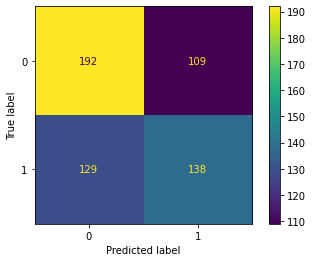

(0.5809859154929577, 0.5809859154929577, 0.5809859154929577, None)


In [50]:
assess_classification_model(y_test, y_pred)

In [35]:
#support vector machine/classifier
from sklearn.svm import SVC
parameters = {'C': [0.001, 0.01, 0.1, 1.0, 10.0,100.0], 
              'kernel': ['rbf', 'linear'], 
              'gamma': ['scale', 'auto'],
              'class_weight': ["balanced"]}
              

svc_pipe = Pipeline([('normalizer', Normalizer(8, False)), 
                 ('wavelet', WaveletTransformer()),
                 ('minmaxscaler', MinMaxScaler()),
                 ('svm', GridSearchCV(SVC(), parameters))
                ])

In [36]:
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer(nbits=8, signed=False)),
                ('wavelet', WaveletTransformer()),
                ('minmaxscaler', MinMaxScaler()),
                ('svm',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                100.0],
                                          'class_weight': ['balanced'],
                                          'gamma': ['scale', 'auto'],
                                          'kernel': ['rbf', 'linear']}))])

In [37]:
svc_pipe['svm'].best_params_

{'C': 1.0, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}

In [38]:
y_pred = svc_pipe.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,

y_true
415     0
1596    1
1322    0
2271    1
1966    1
       ..
163     0
1885    1
252     0
1776    1
1644    1
Name: target, Length: 568, dtype: int32
y_pred
[1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0
 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1
 1 0 0 0 1 

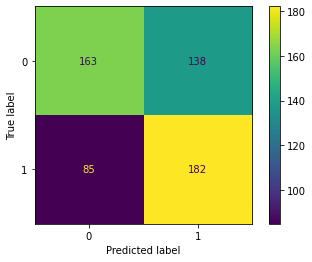

(0.6073943661971831, 0.6073943661971831, 0.6073943661971831, None)


In [39]:
assess_classification_model(y_test, y_pred)

In [28]:
import pickle
filename = 'keypress_gdc_pipeline.sav'
pickle.dump(gd_pipe, open(filename, 'wb'))

# Attempt with Wavelet Tranformers

In [19]:
import lightgbm as lgb
from sklearn.metrics import f1_score
parameters = {"num_leaf": [3, 7, 15, 31, 63],
                "bagging_frac": [.25, .5, .75, 1],
                "feature_frac": [.25, .5, .75, 1]
             }

wavelets = ['haar', 'db',
            'sym', 'coif', 'bior', 'rbio', 'dmey']

for w in wavelets:
    for w2 in pywt.wavelist(w):
        lgb_pipe = Pipeline([('normalizer', st.Normalizer(8, False)),
                 #('arc', st.AutoregressiveCoefficients()),
                 ('wpe', st.WaveletPacketEntropy(wavelet=w2, end_index=MAX_SIZE,)),
                 ('minmaxscaler', MinMaxScaler()),
                 ('lgb', lgb.LGBMClassifier())
                ])
        lgb_pipe.fit(X_train, y_train)   
        y_pred = lgb_pipe.predict(X_test)
        print(w2 + " " + str(f1_score(y_test, y_pred, average=None)) + " " + str(f1_score(y_test, y_pred, average='macro')))


haar [0.71547421 0.68037383] 0.6979240207131416
db1 [0.71547421 0.68037383] 0.6979240207131416
db2 [0.67918089 0.65818182] 0.668681352776916
db3 [0.68820679 0.62669246] 0.6574496208085043
db4 [0.67623604 0.60117878] 0.6387074132912206
db5 [0.67642276 0.61804223] 0.6472324953575831
db6 [0.71090047 0.6361829 ] 0.6735416882590711
db7 [0.69329073 0.62352941] 0.6584100732944935
db8 [0.69662921 0.63157895] 0.6641040804257836
db9 [0.70886076 0.63492063] 0.671890697207153
db10 [0.72213501 0.64529058] 0.683712794505809
db11 [0.70032573 0.64750958] 0.673917655721542
db12 [0.71132376 0.64440079] 0.6778622749049799
db13 [0.7264     0.66536204] 0.6958810176125244
db14 [0.69826224 0.62027833] 0.6592702866529103
db15 [0.70700637 0.63779528] 0.6724008225086513
db16 [0.7235387  0.65208748] 0.6878130898652319
db17 [0.71335505 0.66283525] 0.6880951489510403
db18 [0.72300469 0.64386318] 0.6834339369550637
db19 [0.73501577 0.66533865] 0.7001772091444946
db20 [0.71361502 0.63179074] 0.6727028839704896
db21 

In [21]:
lgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer(nbits=8, signed=False)),
                ('arc', AutoregressiveCoefficients()),
                ('minmaxscaler', MinMaxScaler()), ('lgb', LGBMClassifier())])

In [22]:
y_pred = lgb_pipe.predict(X_test)

y_true
415     0
1596    1
1322    0
2271    1
1966    1
       ..
163     0
1885    1
252     0
1776    1
1644    1
Name: target, Length: 568, dtype: int32
y_pred
[0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1
 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 1 0 

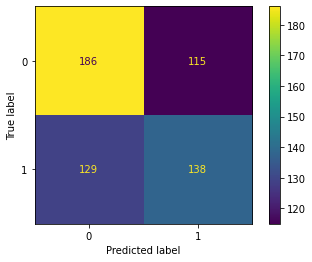

(0.5704225352112676, 0.5704225352112676, 0.5704225352112676, None)


In [23]:
assess_classification_model(y_test, y_pred)

In [26]:
!pip list

Package                           Version
--------------------------------- --------------------
aiohttp                           3.8.1
aiosignal                         1.2.0
alabaster                         0.7.12
anaconda-client                   1.9.0
anaconda-project                  0.10.2
anyio                             3.5.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.2
astroid                           2.6.6
astropy                           5.0.4
asttokens                         2.0.5
async-timeout                     4.0.1
atomicwrites                      1.4.0
attrs                             21.4.0
audioread                         2.1.9
Automat                           20.2.0
autopep8                          1.6.0
Babel                             2.9.1
backcall                          0.2.0
backports.entry-points-selectable 1.1.0
backports.functoo

In [38]:
#trying out with WaveletPacketEntropy(n=6) using rbior wavelet
import lightgbm as lgb
from sklearn.metrics import f1_score
lgb_pipe = Pipeline([('normalizer', st.Normalizer(8, False)),
         #('arc', st.AutoregressiveCoefficients()),
         ('wpe', st.WaveletPacketEntropy(wavelet="rbio3.1", end_index=MAX_SIZE, level=8)),
         ('minmaxscaler', MinMaxScaler()),
         ('lgb', lgb.LGBMClassifier())
        ])

In [39]:
lgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('wpe',
                 WaveletPacketEntropy(end_index=9873, level=8,
                                      wavelet='rbio3.1')),
                ('minmaxscaler', MinMaxScaler()), ('lgb', LGBMClassifier())])

In [40]:
y_pred = lgb_pipe.predict(X_test)

y_true
415     0
1596    1
1322    0
2271    1
1966    1
       ..
163     0
1885    1
252     0
1776    1
1644    1
Name: target, Length: 568, dtype: int32
y_pred
[0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 0 

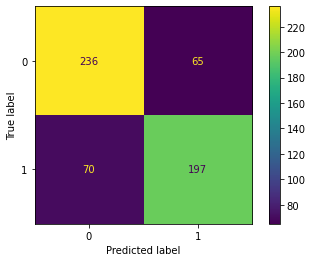

(0.7623239436619719, 0.7623239436619719, 0.7623239436619719, None)


In [41]:
assess_classification_model(y_test, y_pred)

In [43]:
from kymatio.sklearn import Scattering1D
scattering_transformer = Scattering1D(12, 8042)

In [54]:
X_train

X_0  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  ...  X_9863  X_9864  \
940   127  127  128  127  127  127  128  127  128  128  ...       0       0   
741   125  124  123  124  124  125  125  125  125  124  ...       0       0   
2797  134  134  134  135  134  133  133  132  132  133  ...       0       0   
2204  130  131  131  130  131  130  130  130  130  129  ...       0       0   
787   127  127  127  127  129  129  130  129  129  128  ...       0       0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...     ...   
1638  124  124  123  123  122  125  125  125  126  125  ...       0       0   
1095  129  129  129  129  129  128  129  128  128  129  ...       0       0   
1130  129  130  130  130  128  129  129  128  129  128  ...       0       0   
1294  127  127  127  128  128  128  127  128  128  128  ...       0       0   
860   132  131  132  131  131  131  131  131  131  130  ...       0       0   

      X_9865  X_9866  X_9867  X_9868  X_9869  X_9870  X_9871  X_9872  
940        0       0       0       0       0       0       0       0  
741        0       0       0       0       0       0       0       0  
2797       0       0       0       0       0       0       0       0  
2204       0       0       0       0       0       0       0       0  
787        0       0       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...     ...     ...  
1638       0       0       0       0       0       0       0       0  
1095       0       0       0       0       0       0       0       0  
1130       0       0       0       0       0       0       0       0  
1294       0       0       0       0       0       0       0       0  
860        0       0       0       0       0       0       0       0  

[2268 rows x 9873 columns]

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

wp = st.WaveletPacketEntropy(wavelet="rbio3.1", end_index=MAX_SIZE, level=8)
ar = st.AutoregressiveCoefficients(end_index=MAX_SIZE)
fft =st. NormFFT(n=5000)
scattering_transformer = Scattering1D(12, MAX_SIZE)


column_transformer = ColumnTransformer([('wavelet_packet', wp, X_train.columns),
                                       ('autoregressive_coef', ar, X_train.columns),
                                       ('fft', fft, X_train.columns)])
                                       
pipeline = make_pipeline(st.Normalizer(8, False), column_transformer, StandardScaler(), lgb.LGBMClassifier())

In [82]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer(nbits=8, signed=False)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('wavelet_packet',
                                                  WaveletPacketEntropy(end_index=9873,
                                                                       level=8,
                                                                       wavelet='rbio3.1'),
                                                  Index(['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9',
       ...
       'X_9863', 'X_9864', 'X_9865', 'X_9866', 'X_9867', 'X_9868', 'X_9869',
       'X_9870', 'X_9871', '...
       'X_9863', 'X_9864', 'X_9865', 'X_9866', 'X_9867', 'X_9868', 'X_9869',
       'X_9870', 'X_9871', 'X_9872'],
      dtype='object', length=9873)),
                                                 ('fft', NormFFT(),
                                                  Index(['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_

In [83]:
y_pred = pipeline.predict(X_test)

y_true
415     0
1596    1
1322    0
2271    1
1966    1
       ..
163     0
1885    1
252     0
1776    1
1644    1
Name: target, Length: 568, dtype: int32
y_pred
[0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0
 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1
 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1
 1 1 1 0 0 

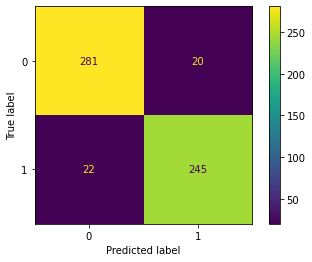

(0.926056338028169, 0.926056338028169, 0.926056338028169, None)


In [84]:
assess_classification_model(y_test, y_pred)

# Attempt on Typing